In [46]:

from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from itertools import product
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

RSEED=42



In [47]:
df_tanzania=pd.read_csv("data/Train.csv")
variable_features=pd.read_csv("data/VariableDefinitions.csv")

In [48]:
variable_features

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [49]:
X = df_tanzania.drop(['total_cost','ID'],axis=1)
y = df_tanzania.total_cost

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
#X_test = test_features.drop('total_cost',axis=1)

#y_test = test_features.total_cost



In [52]:
df_tanzania.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [53]:
X_train.isnull().sum()

country                    0
age_group                  0
travel_with              833
total_female               1
total_male                 4
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          226
dtype: int64

In [54]:
df_tanzania.duplicated().sum()


0

In [55]:
df_tanzania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [56]:
unique_values = X_train.apply(lambda col: col.unique())
print('unique:',unique_values)

unique: country                  [SOUTH AFRICA, KENYA, POLAND, IRELAND, UNITED ...
age_group                                        [25-44, 1-24, 45-64, 65+]
travel_with              [nan, Spouse and Children, Spouse, Friends/Rel...
total_female             [0.0, 2.0, 1.0, 4.0, 6.0, 3.0, 7.0, 5.0, 10.0,...
total_male               [1.0, 2.0, 0.0, 3.0, 4.0, 5.0, 6.0, nan, 9.0, ...
purpose                  [Meetings and Conference, Leisure and Holidays...
main_activity            [Wildlife tourism, Beach tourism, Hunting tour...
info_source              [Friends, relatives, Radio, TV, Web, Travel, a...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                             [No, Yes]
package_food                                                     [No, Yes]
package_transport_tz                                             [No, Yes]
package_sightseei

In [57]:
unique_values.to_csv('data/unique_Value_train_features.csv')

In [58]:
X_train.shape

(3606, 21)

In [59]:
X_train['total_female'].max()

49.0

In [60]:
X_train['total_female'].mean().round()

1.0

In [61]:
X_train['total_female'].fillna(round(X_train['total_female'].mean()), inplace=True)

In [62]:
X_train['total_female']
X_train['total_female'].isnull().sum()

0

In [63]:
X_train['total_male'].fillna(round(X_train['total_male'].mean()), inplace=True)
X_train['total_male'].isnull().sum()

0

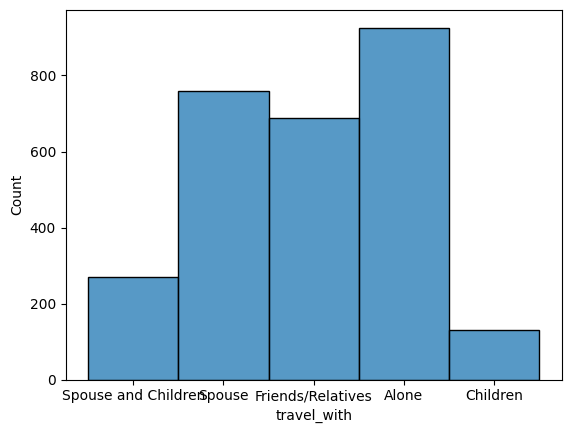

In [64]:
#travel_with
sns.histplot(X_train.travel_with)
plt.show()

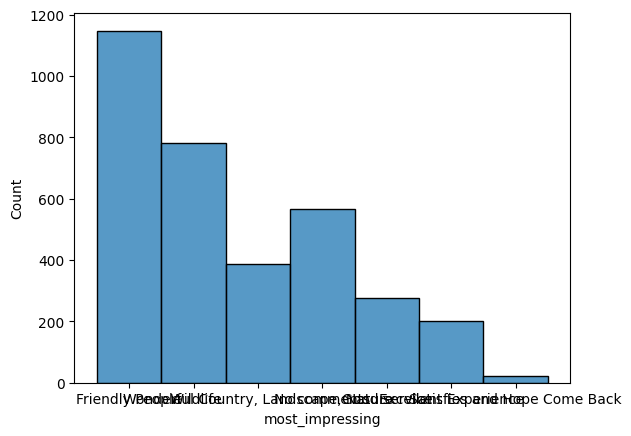

In [65]:
#most_impressing
sns.histplot(X_train.most_impressing)
plt.show()

In [66]:
X_train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3075,SOUTH AFRICA,25-44,NaN,0.0,1.0,Meetings and Conference,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,2.0,0.0,Credit Card,No,Friendly People
2915,KENYA,25-44,Spouse and Children,2.0,2.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,0.0,12.0,Cash,Yes,Friendly People
2304,POLAND,1-24,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Independent,No,...,No,No,No,No,No,3.0,6.0,Cash,Yes,Wildlife
1196,IRELAND,45-64,Friends/Relatives,0.0,2.0,Business,Wildlife tourism,"Radio, TV, Web",Independent,No,...,No,No,No,No,No,2.0,0.0,Credit Card,Yes,Friendly People
620,UNITED KINGDOM,45-64,NaN,1.0,0.0,Volunteering,Hunting tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,3.0,0.0,Cash,No,Friendly People


<Axes: >

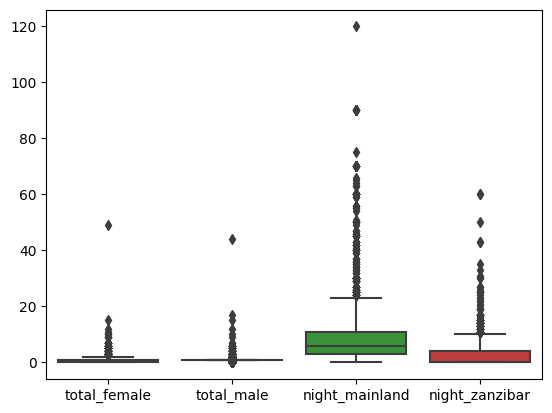

In [67]:
sns.boxplot(X_train)

<Axes: ylabel='night_zanzibar'>

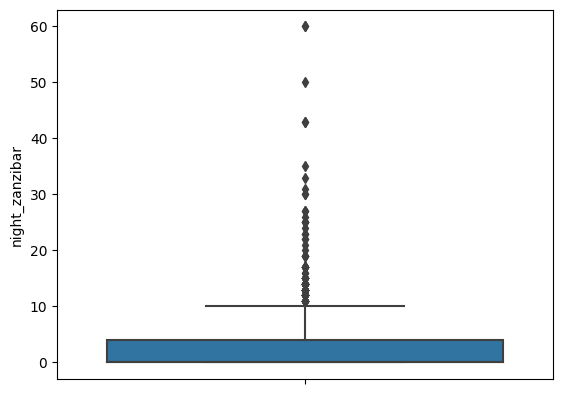

In [68]:
sns.boxplot(X_train, y ='night_zanzibar')

<Axes: ylabel='night_mainland'>

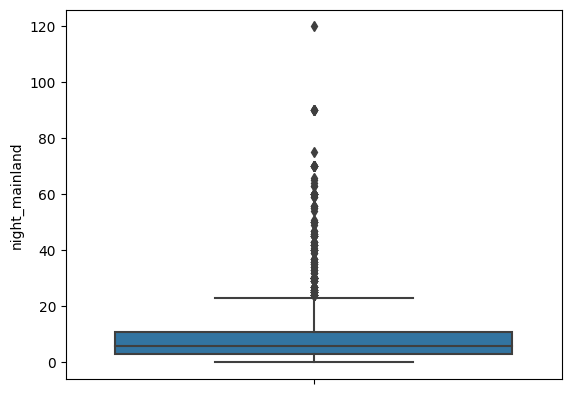

In [69]:
sns.boxplot(X_train, y ='night_mainland')

In [70]:
stats_mainland = X_train["night_mainland"].describe()
stats_mainland

count    3606.000000
mean        8.430948
std        10.145766
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       120.000000
Name: night_mainland, dtype: float64

In [71]:
Q1 = stats_mainland['25%']
Q2 = stats_mainland['50%']
Q3 = stats_mainland['75%']
IQR = Q3 - Q1
lower_whisker = max(X_train.night_mainland[X_train.night_mainland >= (Q1 - 1.5 * IQR)].min(), X_train.night_mainland.min())
upper_whisker = min(X_train.night_mainland[X_train.night_mainland <= (Q3 + 1.5 * IQR)].max(), X_train.night_mainland.max())
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Lower Whisker: 0.0
Upper Whisker: 23.0


In [72]:
#cleaned from outliers
X_train = X_train.query("night_mainland <= 23")

<Axes: ylabel='night_zanzibar'>

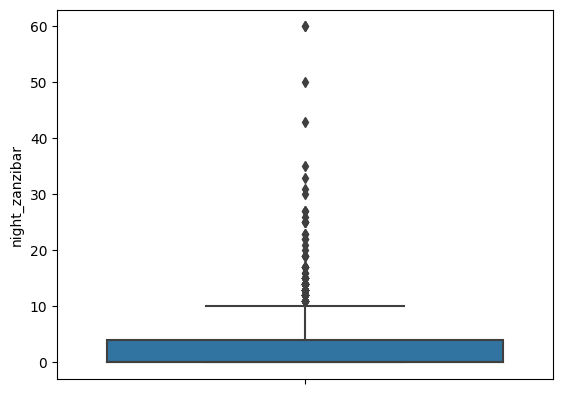

In [73]:
sns.boxplot(X_train, y ='night_zanzibar')

In [74]:
stats_zanzibar = X_train["night_zanzibar"].describe()
stats_zanzibar

count    3402.000000
mean        2.340094
std         4.205453
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        60.000000
Name: night_zanzibar, dtype: float64

In [75]:
Q1 = stats_zanzibar['25%']
Q2 = stats_zanzibar['50%']
Q3 = stats_zanzibar['75%']
IQR = Q3 - Q1
lower_whisker = max(X_train.night_zanzibar[X_train.night_zanzibar >= (Q1 - 1.5 * IQR)].min(), X_train.night_zanzibar.min())
upper_whisker = min(X_train.night_zanzibar[X_train.night_zanzibar <= (Q3 + 1.5 * IQR)].max(), X_train.night_zanzibar.max())
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Lower Whisker: 0.0
Upper Whisker: 10.0


In [76]:
#cleaned from outliers
X_train = X_train.query("night_zanzibar <= 10")

<Axes: >

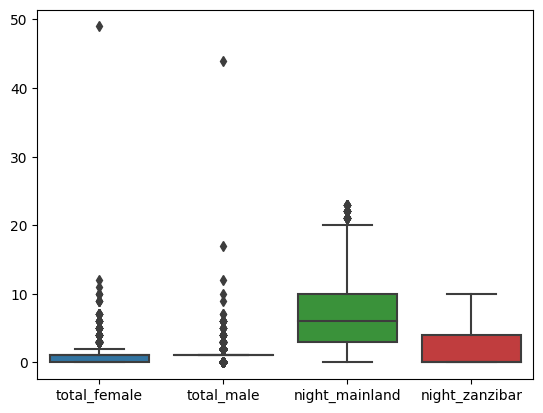

In [77]:
sns.boxplot(X_train)

<Axes: ylabel='total_female'>

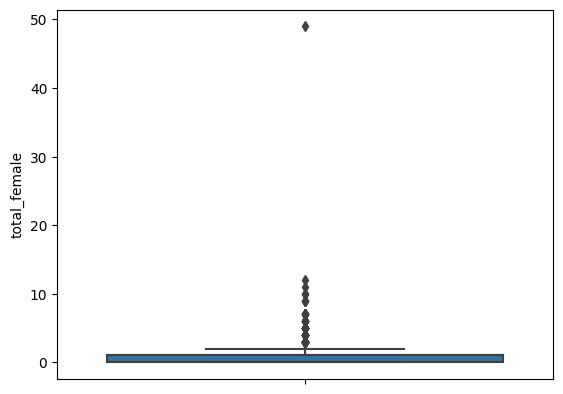

In [78]:
sns.boxplot(X_train, y ='total_female')

In [79]:
stats_female = X_train["total_female"].describe()
stats_female

count    3267.000000
mean        0.929293
std         1.354119
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        49.000000
Name: total_female, dtype: float64

In [80]:

Q1 = stats_female['25%']
Q2 = stats_female['50%']
Q3 = stats_female['75%']
IQR = Q3 - Q1
lower_whisker = max(X_train.total_female[X_train.total_female >= (Q1 - 1.5 * IQR)].min(), X_train.total_female.min())
upper_whisker = min(X_train.total_female[X_train.total_female <= (Q3 + 1.5 * IQR)].max(),X_train.total_female.max())
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Lower Whisker: 0.0
Upper Whisker: 2.0


In [81]:
#cleaned from outliers
X_train = X_train.query("total_female <= 2")

In [82]:
X_train.shape

(3090, 21)

<Axes: >

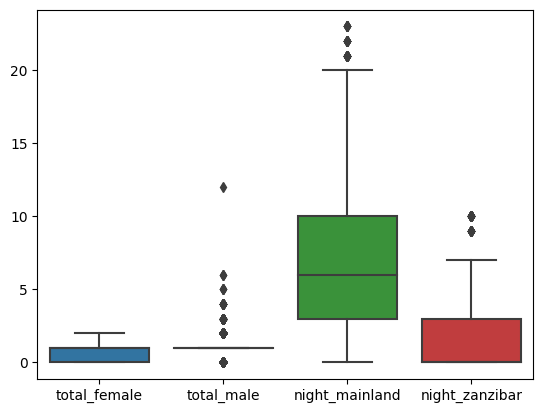

In [83]:
sns.boxplot(X_train)

In [84]:
X_train.shape

(3090, 21)

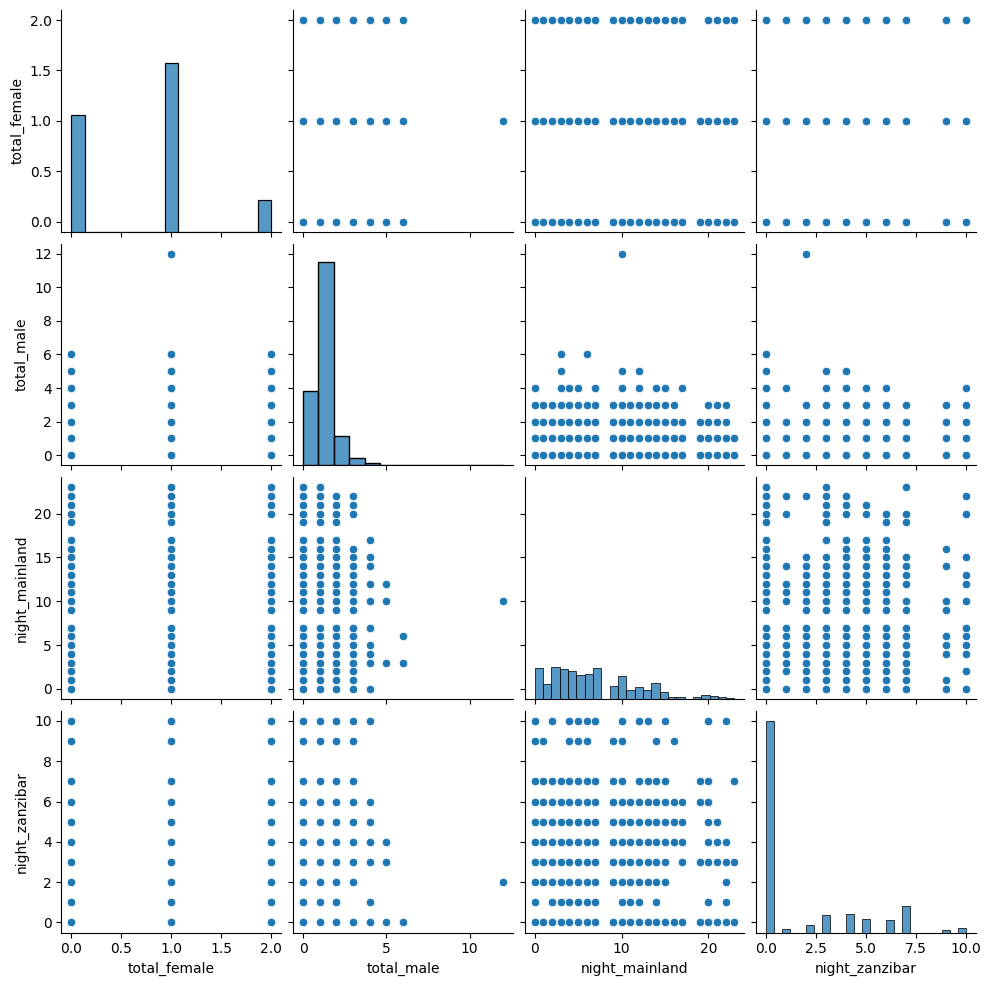

In [85]:
sns.pairplot(X_train)

<Axes: >

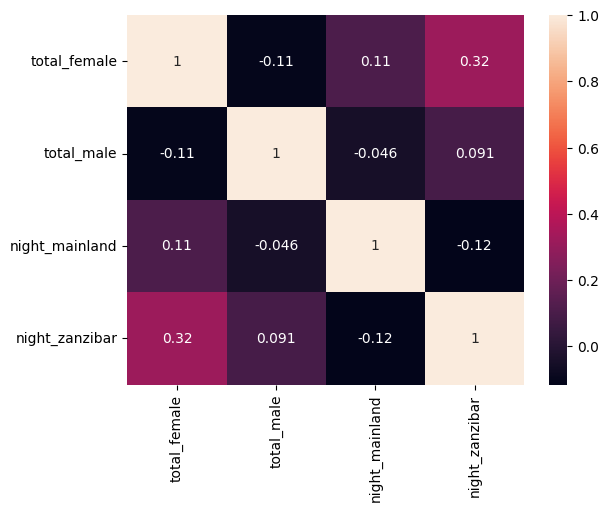

In [89]:
correlations = X_train.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

In [92]:
X_train["travel_with"].isna().sum()

741

In [344]:
X_train.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing'],
      dtype='object')

In [345]:
#Encoding
col_encode = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement','payment_mode', 'most_impressing']
col_map = ['package_transport_int', 'package_accomodation', 'package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour','package_insurance','first_trip_tz',]


In [346]:
# Replace 'yes' with 1 and 'no' with 0 in specified columns 
X_train[col_map] = X_train[col_map].replace({'Yes': 1, 'No': 0}) 
print(X_train)

                       country age_group          travel_with  total_female   
3075              SOUTH AFRICA     25-44                  NaN           0.0  \
2304                    POLAND      1-24               Spouse           1.0   
1196                   IRELAND     45-64    Friends/Relatives           0.0   
620             UNITED KINGDOM     45-64                  NaN           1.0   
1215            UNITED KINGDOM     25-44               Spouse           1.0   
...                        ...       ...                  ...           ...   
3171                    FRANCE     25-44  Spouse and Children           2.0   
3444                     JAPAN     45-64                  NaN           0.0   
3092                     KENYA     45-64                  NaN           0.0   
3772                  ZIMBABWE     25-44                Alone           0.0   
860   UNITED STATES OF AMERICA       65+               Spouse           1.0   

      total_male                  purpose     main_

In [347]:
X_train.corr(numeric_only = True)

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
total_female,1.000000,-0.105205,0.276505,0.303665,0.291199,0.286873,0.231626,0.221731,0.183280,0.110064,0.316751,0.249116
total_male,-0.105205,1.000000,0.112329,0.043198,0.029459,0.034201,0.034098,0.022777,0.067471,-0.046379,0.090544,0.017402
package_transport_int,0.276505,0.112329,1.000000,0.658292,0.612041,0.585904,0.407586,0.409259,0.466678,-0.012774,0.309780,0.267004
package_accomodation,0.303665,0.043198,0.658292,1.000000,0.933726,0.868646,0.707321,0.733451,0.444706,0.111373,0.215133,0.426175
package_food,0.291199,0.029459,0.612041,0.933726,1.000000,0.844162,0.677617,0.711823,0.446735,0.087984,0.201654,0.408933
package_transport_tz,0.286873,0.034201,0.585904,0.868646,0.844162,1.000000,0.693463,0.699734,0.444137,0.122160,0.190991,0.399926
package_sightseeing,0.231626,0.034098,0.407586,0.707321,0.677617,0.693463,1.000000,0.792509,0.382229,0.207442,0.021866,0.346577
package_guided_tour,0.221731,0.022777,0.409259,0.733451,0.711823,0.699734,0.792509,1.000000,0.427568,0.183766,0.045418,0.370152
package_insurance,0.183280,0.067471,0.466678,0.444706,0.446735,0.444137,0.382229,0.427568,1.000000,-0.023044,0.186858,0.219117
night_mainland,0.110064,-0.046379,-0.012774,0.111373,0.087984,0.122160,0.207442,0.183766,-0.023044,1.000000,-0.115301,0.122956


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'total_female'),
  Text(1, 0, 'total_male'),
  Text(2, 0, 'package_transport_int'),
  Text(3, 0, 'package_accomodation'),
  Text(4, 0, 'package_food'),
  Text(5, 0, 'package_transport_tz'),
  Text(6, 0, 'package_sightseeing'),
  Text(7, 0, 'package_guided_tour'),
  Text(8, 0, 'package_insurance'),
  Text(9, 0, 'night_mainland'),
  Text(10, 0, 'night_zanzibar'),
  Text(11, 0, 'first_trip_tz')])

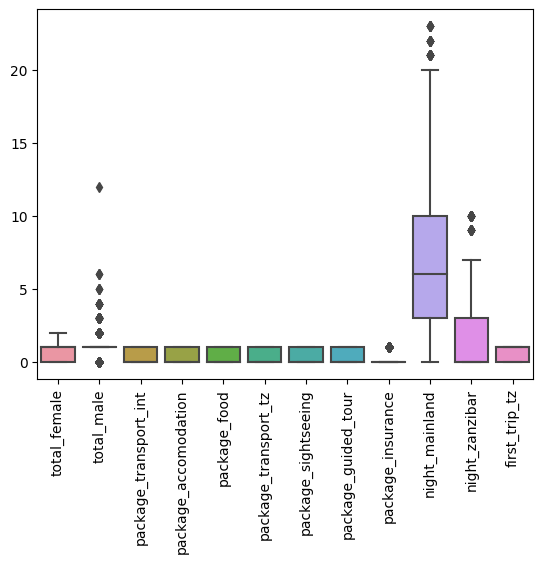

In [348]:
sns.boxplot(X_train)
plt.xticks(rotation=90)

In [349]:
#OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

In [350]:
#Encoding
col_encode = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement','payment_mode', 'most_impressing']
X_train[col_encode].nunique() 
ohe.fit(X_train[col_encode]) 
t = ohe.transform(X_train[col_encode])


In [351]:
ohe.get_feature_names_out() 

array(['country_AUSTRALIA', 'country_AUSTRIA', 'country_BELGIUM',
       'country_BRAZIL', 'country_BURGARIA', 'country_BURUNDI',
       'country_CANADA', 'country_CAPE VERDE', 'country_CHILE',
       'country_CHINA', 'country_COLOMBIA', 'country_CONGO',
       'country_COSTARICA', 'country_CROATIA', 'country_CYPRUS',
       'country_CZECH REPUBLIC', 'country_DENMARK', 'country_DJIBOUT',
       'country_DOMINICA', 'country_DRC', 'country_EGYPT',
       'country_ESTONIA', 'country_ETHIOPIA', 'country_FINLAND',
       'country_FRANCE', 'country_GERMANY', 'country_GREECE',
       'country_HUNGARY', 'country_INDIA', 'country_INDONESIA',
       'country_IRAN', 'country_IRAQ', 'country_IRELAND',
       'country_ISRAEL', 'country_ITALY', 'country_IVORY COAST',
       'country_JAPAN', 'country_KENYA', 'country_KOREA',
       'country_KUWAIT', 'country_LATVIA', 'country_LEBANON',
       'country_LESOTHO', 'country_LITHUANIA', 'country_LUXEMBOURG',
       'country_MALAWI', 'country_MALAYSIA', 'c

In [352]:
X_train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3075,SOUTH AFRICA,25-44,NaN,0.0,1.0,Meetings and Conference,Wildlife tourism,"Friends, relatives",Independent,0,...,0,0,0,0,0,2.0,0.0,Credit Card,0,Friendly People
2304,POLAND,1-24,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Independent,0,...,0,0,0,0,0,3.0,6.0,Cash,1,Wildlife
1196,IRELAND,45-64,Friends/Relatives,0.0,2.0,Business,Wildlife tourism,"Radio, TV, Web",Independent,0,...,0,0,0,0,0,2.0,0.0,Credit Card,1,Friendly People
620,UNITED KINGDOM,45-64,NaN,1.0,0.0,Volunteering,Hunting tourism,"Travel, agent, tour operator",Independent,0,...,0,0,0,0,0,3.0,0.0,Cash,0,Friendly People
1215,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Package Tour,1,...,1,1,1,1,1,7.0,7.0,Cash,1,Wildlife


In [353]:
# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
x_train_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())
x_train_encode.head()
# introduced into the frame
X_train = pd.concat([X_train.reset_index(drop=True), x_train_encode], axis=1)
X_train.drop(columns=col_encode,inplace=True)


In [354]:
X_train.head()
X_train.shape

(3090, 143)